In [8]:
import numpy as np
import math
from matplotlib import pyplot as plt
import random
import pandas as pd

In [9]:
import seaborn as sns

In [34]:
immune_supressed=pd.read_csv('immunesupressed_monkeyflow.csv')

In [190]:
healthy=pd.read_csv('healthy populationflow.csv')

In [25]:
cumulative=[]
for i in range(len(Simulation['time'])):
    cumulative.append(np.trapz(Simulation['healthy'][:i],Simulation['time'][:i]))

In [41]:
def cumulative_prob(flux,time,prob):
    cumulative=[]
    for i in range(len(flux)):
        cumulative.append(np.trapz(flux[:i],time[:i]))
    return 1-np.power(1-0.00046,cumulative)

In [30]:
def sample_from_exponential_dist(a):
    # random sampling from exponential distribution with mean a
    # we will use inverse sampling 
    u = random.random()
    x = (1/a) * math.log(1/(1-u))
    return x


In [31]:
def inhomogeneousPoisson(Lambda, T):
    '''
    First, we aim to generate an array arrival_times[] representing the arrival time from an homogeneous Poisson Process with 
    fixed rate lambda_max up to time T; meanwhile, we also generate samples from uniform distribution on [0,1] which will decide
    whether these arrival times from homogeneous Poisson Process will be accepted as sample of the inhomogeneous Poisson Process
    '''
    lambda_max = max(Lambda[i][1] for i in range(len(Lambda)))
    
    arrival_times = [0]
    unif_samples = []
    while arrival_times[-1] <= T:
        arrival_times.append(arrival_times[-1]+sample_from_exponential_dist(lambda_max))
        unif_samples.append(random.random())
        
    # take out the first dummy time 0 and the last time which exceeds maximum time T     
    arrival_times = arrival_times[1:-1]
    
    # check if we accept each arrival time in arrival_times[]
    accepted_arrival_times = []
    for i in range(len(arrival_times)):
        # find the rate lambda[t] at the proposed arrival time
        for j in range(len(Lambda)):
            if Lambda[j][0] > arrival_times[i]:
                break
        acceptance_probability = Lambda[j][1]/lambda_max
        if acceptance_probability > unif_samples[i]:
            accepted_arrival_times.append(arrival_times[i])
    
    return accepted_arrival_times

In [217]:
immune_supressed

,days,pop,immunesupressed_flow,HD79,HD79_flow,145-97,145-97_flow,396-09,396-09_flow,274-98,274-98_flow,174-97,174-97_flow,GM04,GM04_flow
0,0.000000,0.001000,0.000000e+00,0.001000,0.000000e+00,0.001000,0.000000e+00,1.000000e-03,0.000000e+00,0.001000,0.000000e+00,0.001000,0.000000e+00,0.001000,0.000000e+00
1,0.166166,0.000976,2.760000e-12,0.000975,1.260000e-16,0.000978,1.640000e-13,9.912800e-04,1.160000e-20,0.000939,2.500000e-12,0.000976,2.760000e-12,0.000976,2.760000e-12
2,0.332332,0.001004,4.360000e-10,0.000978,3.160000e-13,0.001015,9.010000e-09,1.037374e-03,4.620000e-15,0.000904,2.830000e-09,0.001004,4.360000e-10,0.001004,4.360000e-10
3,0.498498,0.001079,2.760000e-07,0.001008,7.260000e-11,0.001109,7.050000e-06,1.137402e-03,4.880000e-11,0.000891,2.040000e-07,0.001079,2.760000e-07,0.001079,2.760000e-07
4,0.664665,0.001204,1.170000e-06,0.001062,1.280000e-08,0.001261,2.857280e-04,1.293498e-03,1.690000e-08,0.000899,9.470000e-07,0.001204,1.170000e-06,0.001204,1.170000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,165.335335,0.000000,1.815923e-03,0.000000,6.750000e-09,0.005666,2.110000e-13,2.260000e-07,1.030000e-08,0.000000,-1.930000e-05,0.000000,-4.880000e-10,0.000000,-1.150000e-06
996,165.501501,0.000000,1.577967e-03,0.000000,6.090000e-09,0.005656,2.100000e-13,2.210000e-07,8.940000e-09,0.000000,-1.820000e-05,0.000000,-3.460000e-10,0.000000,-5.760000e-09
997,165.667668,0.000000,1.339769e-03,0.000000,5.440000e-09,0.005646,2.090000e-13,2.170000e-07,7.600000e-09,0.000000,-1.700000e-05,0.000000,-2.040000e-10,0.000000,1.140000e-06
998,165.833834,0.000000,1.101330e-03,0.000000,4.780000e-09,0.005636,2.080000e-13,2.130000e-07,6.250000e-09,0.000000,-1.570000e-05,0.000000,-6.210000e-11,0.000000,2.290000e-06


In [192]:
# reshape toy data 
Lambda2 = list(zip(healthy['days'],healthy['pop_flow']))

In [193]:
arrival_times2 = inhomogeneousPoisson(Lambda2, T)

In [114]:
max(arrival_times)-min(arrival_times)

130.25073286319494

In [198]:
d2 = {'arrival time': arrival_times2}
df2 = pd.DataFrame(data=d2)

In [199]:
df2['day']=(df2['arrival time'].astype(int)+1)

In [220]:
def data_transform(ts,ys_ind,num):
    ys_ind  = np.log10(np.maximum(np.ones(len(ys_ind)),1000*ys_ind))
    for (i,t) in enumerate(ts):
        if t>num:
            ys_ind[i]=max(1,ys_ind[i])
    return ys_ind

Text(100, 200, 'Totoal virus: 6407')

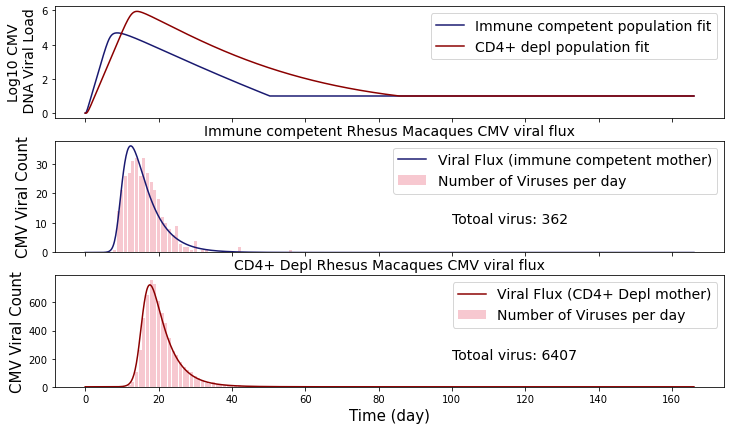

In [237]:
fig, ax = plt.subplots(3,1,sharex=True,figsize=(12,7))
ax[0].plot(healthy['days'],data_transform(healthy['days'],healthy['pop'],10),label="Immune competent population fit",color='midnightblue')
ax[0].plot(immune_supressed['days'],data_transform(immune_supressed['days'],immune_supressed['pop'],10),label="CD4+ depl population fit",color='darkred')
ax[0].legend(loc=1,fontsize=14)
ax[0].set_ylabel('Log10 CMV\n DNA Viral Load',fontsize=14)

sns.countplot(data=df2,x='day',order=list(range(0, 167)),color='pink',label='Number of Viruses per day',dodge=False,ax=ax[1])
ax[1].plot(healthy['days'],healthy['pop_flow'],label="Viral Flux (immune competent mother)",color='midnightblue')
ax[1].set(xticklabels=[0,20,40,60,80,100,120,140,160])
ax[1].set(xticks=[0,20,40,60,80,100,120,140,160])
ax[1].set_xlabel("",fontsize=15)
ax[1].legend(loc=1,fontsize=14)
ax[1].set_ylim(ymin=0)
ax[1].set_ylabel("CMV Viral Count",fontsize=15)
ax[1].set_title('Immune competent Rhesus Macaques CMV viral flux',fontsize=14)
ax[1].text(100,10,'Totoal virus: ' + str(len(df2)),fontsize=14)
sns.countplot(data=df,x='day',order=list(range(0, 167)),color='pink',label='Number of Viruses per day',dodge=False,ax=ax[2])
ax[2].plot(immune_supressed['days'],immune_supressed['immunesupressed_flow'],label="Viral Flux (CD4+ Depl mother)",color='darkred')

ax[2].set(xticklabels=[0,20,40,60,80,100,120,140,160])
ax[2].set(xticks=[0,20,40,60,80,100,120,140,160])
ax[2].legend(loc=1,fontsize=14)
ax[2].set_xlabel("Time (day)",fontsize=15)
ax[2].set_ylabel("CMV Viral Count",fontsize=15)
ax[2].set_title('CD4+ Depl Rhesus Macaques CMV viral flux',fontsize=14)
ax[2].text(100,200,'Totoal virus: ' + str(len(df)),fontsize=14)

## Plot: Single Experiment

Red cross denotes the time when arrival happens. Blue curve is the given intensity function $\lambda(t)$

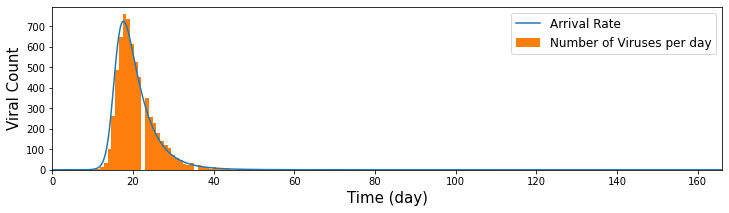

In [164]:
fig, ax = plt.subplots(figsize=(12,3))
T=166;
ax.plot(immune_supressed['days'],immune_supressed['immunesupressed_flow'],label="Arrival Rate")
#Lambda = list(zip(immune_supressed['days'],immune_supressed['immunesupressed_flow']))
#arrival_times = inhomogeneousPoisson(Lambda, T)
#ax.scatter(arrival_times, [0.0001]*len(arrival_times), marker='X',c='r',label="Arrival time")
ax.hist(df['day'], bins=max(df['day']), label='Number of Viruses per day')
plt.xlabel("Time (day)",fontsize=15)
plt.ylabel("Viral Count",fontsize=15)
plt.legend(fontsize=12,loc=1)
plt.xlim(xmin=0,xmax=T)
plt.show()



In [170]:
list(range(0, 167))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166]

In [65]:
class CMVsystem:

    def __init__(self, lam, mu, beta, alpha, delta,S0,p,c, S, L, I, V, ratio,virus_entry):
        self.lam = lam
        self.mu = mu
        self.beta = beta
        self.alpha = alpha
        self.delta=delta
        self.p = p
        self.c = c
        self.S0= S0
        self.t = 0.
        self.S = S
        self.L = L
        self.I = I
        self.V = V
        self.virus_entry=virus_entry
        self.ratio=ratio
        self.trajectory = np.array([[self.S, self.L, self.I,self.V]],dtype=float)
        self.times = None
            
#Define an initializer (__init__(self,beta,gamma,S,I,R)) which accepts model parameters beta and gamma, 
#and initial numbers of hosts in each of the S,I and R compartments.
    def reset(self, S, I, L, V,t=0.):
        self.t = t
        self.S = S
        self.L = L
        self.I = I
        self.V = V
        self.trajectory = np.array([[self.S, self.L, self.I, self.V]],dtype=float)

In [66]:
class StochasticCMVsystem (CMVsystem):

    """Define a specialized subclass of the general SIRsystem for modeling SIR dynamics as a stochastic, continuous
    time process, using the Gillespie method of continuous time Monte Carlo"""

    def step(self):
        """Implement one step of Gillespie's Direct Method based on current reaction rates: identify a reaction to fire
        next, as well as a time at which it will fire, and execute that reaction (similar to as was described in the
        StochasticCells exercise)."""
        
        #if no virus inside the system, wait till the first virus enters the system
        if self.V + self.I + self.L == 0:
            if self.virus_entry:
                self.t = virus_entry.pop()
                self.V = 1
            else:
                return None, self.t
        
            
        
        
        s = np.random.uniform(0,1)
        transition = None
        #S_birth = self.lam
        #S_death = self.mu*self.S
        inf_rate = self.beta*self.V*self.S
        L_to_I = self.alpha*self.L
        #L_death = self.mu*self.L
        I_death = self.delta*self.I
        V_production = self.p*self.I
        V_death = self.c*self.V
        
        
        #S is kept constant
        #CASE1:with latent cells
        
        if s > self.ratio:
            rates=[inf_rate,L_to_I,I_death,V_production,V_death]
            total_rate=np.sum(rates)
            if total_rate == 0.:
                dt=0
            else:
                dt = np.random.exponential(1./total_rate, 1)[0]
            
            if self.virus_entry and self.t+dt > self.virus_entry[-1]:
                #print(self.t , self.virus_entry[-1])
                #recation does not happen, virus entry happens(case 1)
                self.V += 1
                self.t = self.virus_entry.pop()
                transition = 0
                
            else:
                #reaction happens
                if total_rate == 0.:
                    return transition, self.t
                if self.V+self.I+self.L == 0:
                    return transition, self.t
                if self.V+self.I+self.L == 500:
                    return transition, self.t
                ranno = np.random.random()
                if ranno < np.sum(rates[0:1])/total_rate:
                    self.L += 1   #Latent cell production
                    transition = 1
                elif ranno < np.sum(rates[0:2])/total_rate:
                    self.I+=1     #Latent cell become infected
                    self.L-=1
                    transition = 2
                elif ranno < np.sum(rates[0:4])/total_rate:
                    self.I-=1      #Infected Cell death
                    transition = 3
                elif ranno < np.sum(rates[0:5])/total_rate:
                    self.V+=1      #virus creation
                    transition = 4
                elif ranno < np.sum(rates[0:6])/total_rate:
                    self.V-=1     #virus death
                    transition = 5
                    
                self.t += dt
                

        if s <= self.ratio:
            
            rates=[inf_rate,I_death,V_production,V_death]
            total_rate=np.sum(rates)
            if total_rate == 0.:
                dt=0
            else:
                dt = np.random.exponential(1./total_rate, 1)[0]
                

            if self.virus_entry and self.t+dt > self.virus_entry[-1]:
                #recation does not happen, virus entry happens
                self.V += 1
                self.t = self.virus_entry.pop()
                transition = 0
                
            else:
                #reaction happens

                if total_rate == 0.:
                    return transition, self.t
                if self.V + self.I==0:
                    return transition, self.t
                if self.V + self.I==500:
                    return transition, self.t

                ranno = np.random.random()

                if ranno < np.sum(rates[0:1])/total_rate:
                    self.I += 1
                    transition = 1

                elif ranno < np.sum(rates[0:2])/total_rate:
                    self.I -= 1
                    transition = 2
                elif ranno < np.sum(rates[0:3])/total_rate:
                    self.V+=1
                    transition = 3
                elif ranno < np.sum(rates[0:4])/total_rate:
                    self.V-=1
                    transition = 4
                self.t += dt
                
                
                
        #dt = np.random.exponential(1./total_rate, 1)[0]
        #why 1/the hazard function? different from the textbook
        #print(transition, self.t)
        return transition, self.t

            
            
    def run(self, T = None, make_traj=True):
        """Run the Gillespie algorithm for stochastic simulation from time 0 to at least time T, starting with the initial
        values stored in the S,I,R state variables; story the result in self.trajectory if make_traj argument is
        set to True"""

        if T is None:
            T = sys.maxsize
        self.times = [0.]

        transition = 1
        while self.t < T:
            transition, t = self.step()
            if transition == None:
                return self.t
            if make_traj:
                self.trajectory = np.concatenate((self.trajectory, [[self.S,self.L,self.I,self.V]]), axis=0)
            self.times.append(self.t)
        return self.t

In [104]:
arrival_times=[1]

In [105]:
count=0;

In [106]:
for _ in range(100):
    virus_entry=arrival_times[::-1]

    mu=1/4.5; beta=3e-12; alpha=1; delta=0.77; S0=4e8;lam=mu*S0 ;p=1600;c=2; S=S0; L=0; I=0; V=0;ratio=0.5;
    M1 = StochasticCMVsystem(lam, mu, beta, alpha, delta, S0, p, c, S, L, I, V,ratio,virus_entry);

    M1.run(166)
    if M1.trajectory[-1,3]>500:
        count+=1

    



In [107]:
count/100000*100

0.0

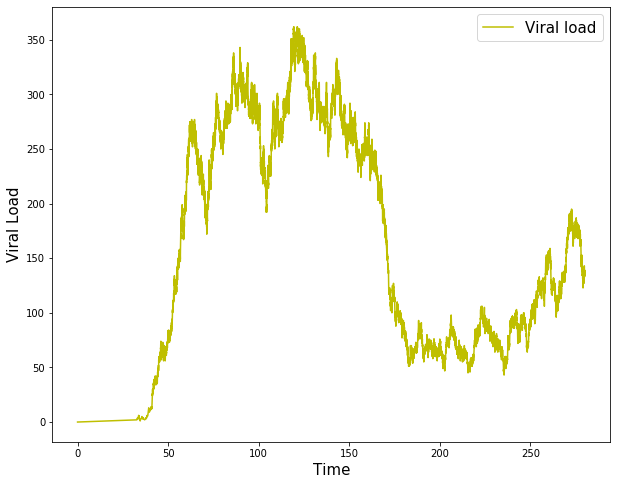

In [166]:
#plt.plot(M1.times[:-1], M1.trajectory[:-1,0], 'b-', label='S')
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(M1.times[:-1], M1.trajectory[:-1,3], 'y-', label='Viral load')

#plt.plot(M1.times[:-1], M1.trajectory[:-1,1], 'r-', label='Latent cells')
#plt.plot(M1.times[:-1], M1.trajectory[:-1,2], 'g-', label='Infected cells')
#plt.yscale("symlog")
plt.xlabel("Time",fontsize=15)
plt.ylabel("Viral Load",fontsize=15)
plt.legend(loc='upper right',fontsize=15)

Text(0, 0.5, 'Cell Count')

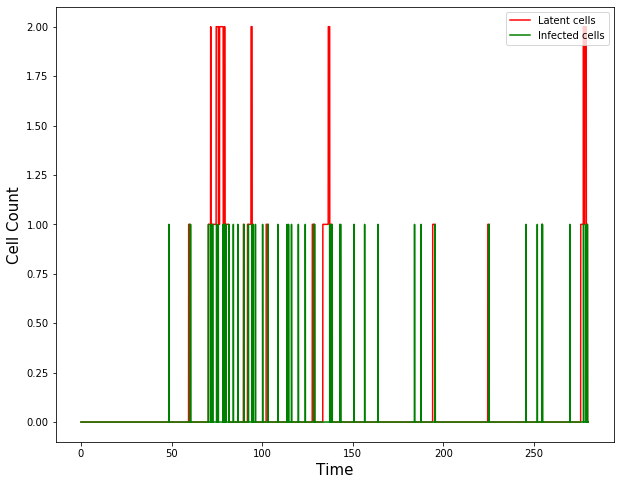

In [167]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(M1.times[:-1], M1.trajectory[:-1,1], 'r-', label='Latent cells')
plt.plot(M1.times[:-1], M1.trajectory[:-1,2], 'g-', label='Infected cells')
plt.xlabel('time',fontsize=15)
plt.ylabel('Cell count',fontsize=15)
plt.legend(loc='upper right')


#plt.yscale("symlog")
plt.xlabel("Time",fontsize=15)
plt.ylabel("Cell Count",fontsize=15)

Text(0, 0.5, 'Virus Count')

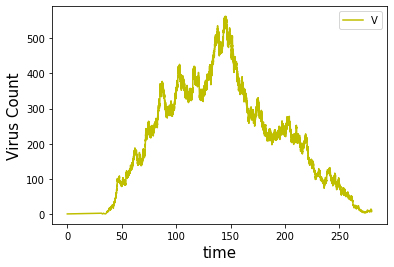

In [160]:
plt.plot(M1.times[:-1], M1.trajectory[:-1,3], 'y-', label='V')
plt.legend(loc='upper right')
plt.xlabel('time',fontsize=15)
plt.ylabel('Virus Count',fontsize=15)